In [13]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

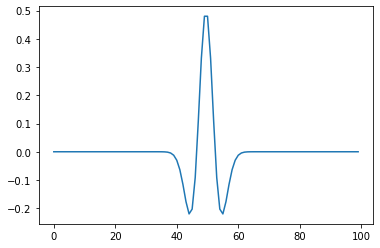

In [20]:
points = 100
a = 3.0
wave = signal.ricker(points, a) # (Number of points, Width)
wave = np.array(wave, dtype=np.float32)
plt.plot(wave)
plt.show()

#### Make Model

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(1,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1024, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)

#### Prepare data

In [43]:
train_data = np.arange(points) / points
train_labels = wave

#### Training

In [53]:
model.compile(optimizer="adam",
    loss="MSE",
    metrics=["accuracy"])
model.fit(train_data, train_labels, epochs=400, batch_size=64, verbose=0)

#### Inferencing

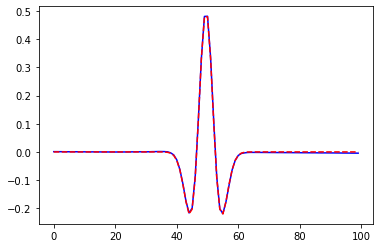

In [54]:
sample = train_data
wave_pred = model.predict(sample)
plt.plot(wave_pred, 'b')
plt.plot(wave, 'r--')
plt.show()

#### Interepolation !

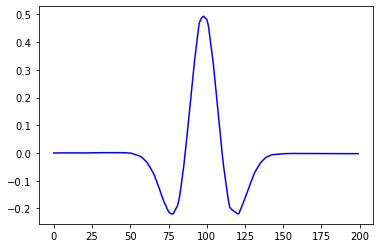

In [56]:
npoints = 400 
fine_samples = np.arange(npoints) / npoints
fine_samples = fine_samples[100:300]
wave_pred2 = model.predict(fine_samples)
plt.plot(wave_pred2, 'b')
plt.show()